Accuracy: 0.9082

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45968
         1.0       0.55      0.13      0.21      4768

    accuracy                           0.91     50736
   macro avg       0.73      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736


Confusion Matrix:
[[45457   511]
 [ 4146   622]]


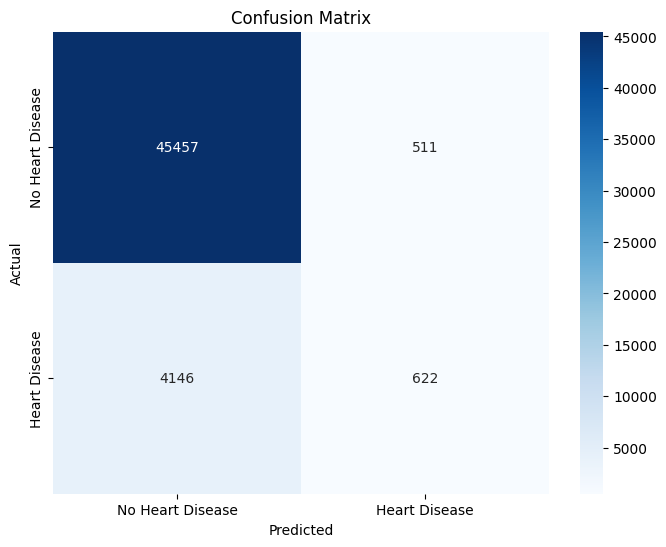


Feature Importance:
              Feature  Importance
17                Age    3.050854
22        GenHlth_5.0    1.880508
21        GenHlth_4.0    1.461607
5              Stroke    0.985499
20        GenHlth_3.0    0.944886
16                Sex    0.761077
1            HighChol    0.607348
0              HighBP    0.528279
2           CholCheck    0.488621
19        GenHlth_2.0    0.400763
4              Smoker    0.359046
6            Diabetes    0.302043
15           DiffWalk    0.285593
12        NoDocbcCost    0.224411
13           MentHlth    0.086653
7        PhysActivity    0.052915
9             Veggies    0.041235
14           PhysHlth    0.039064
3                 BMI    0.007704
8              Fruits    0.006700
11      AnyHealthcare   -0.082914
18             Income   -0.279874
10  HvyAlcoholConsump   -0.354730
26      Education_5.0   -0.954196
24      Education_3.0   -1.023689
27      Education_6.0   -1.042399
25      Education_4.0   -1.043159
23      Education_2.0   -1.

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv('Project_FL/Structured/heart_disease_health_indicators.csv')  # Replace with your actual dataset file path

# 2. Preprocess the data (same preprocessing steps as mentioned previously)
# Handle missing values
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())  # Impute using median

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Impute using mode for categorical columns

# Categorical Encoding
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Apply One-Hot Encoding for multi-category columns (e.g., 'GenHlth', 'Education')
df = pd.get_dummies(df, columns=['GenHlth', 'Education'], drop_first=True)

# Normalize numerical features (Min-Max Scaling)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 3. Separate features (X) and target (y)
X = df.drop(columns='HeartDiseaseorAttack')  # Features
y = df['HeartDiseaseorAttack']  # Target

# 4. Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 6. Make predictions on the test set
y_pred = model.predict(X_test)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 8. Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 9. Feature Importance (Optional)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Checking the number of heart disease vs. no heart disease
class_distribution = y.value_counts()
print("Class Distribution (Heart Disease vs. No Heart Disease):")
print(class_distribution)


Accuracy: 0.7540

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     45968
         1.0       0.25      0.80      0.38      4768

    accuracy                           0.75     50736
   macro avg       0.61      0.77      0.61     50736
weighted avg       0.90      0.75      0.80     50736


Confusion Matrix:
[[34440 11528]
 [  954  3814]]


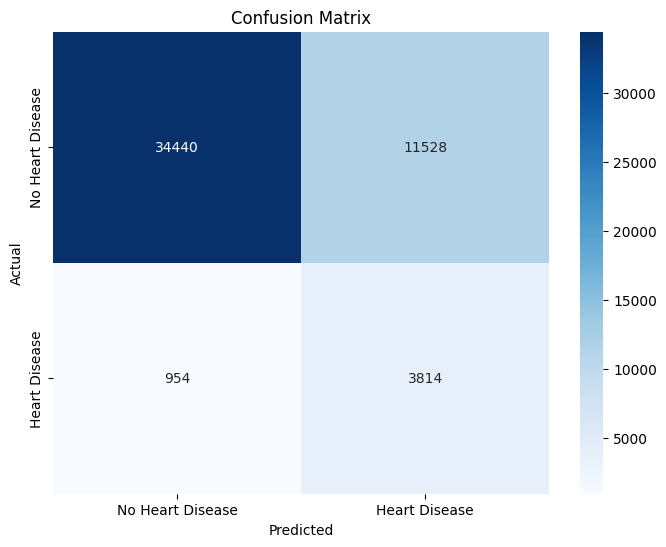


Feature Importance:
              Feature  Importance
17                Age    3.293842
22        GenHlth_5.0    1.841204
21        GenHlth_4.0    1.483103
5              Stroke    1.137743
20        GenHlth_3.0    0.947685
16                Sex    0.814495
1            HighChol    0.628656
0              HighBP    0.559976
2           CholCheck    0.482429
19        GenHlth_2.0    0.391227
4              Smoker    0.372454
6            Diabetes    0.345010
15           DiffWalk    0.314610
12        NoDocbcCost    0.288864
13           MentHlth    0.148324
14           PhysHlth    0.108710
7        PhysActivity    0.056414
9             Veggies    0.037067
3                 BMI    0.013041
8              Fruits    0.002814
11      AnyHealthcare   -0.070972
10  HvyAlcoholConsump   -0.302355
18             Income   -0.370641
26      Education_5.0   -0.667484
24      Education_3.0   -0.710942
25      Education_4.0   -0.754631
27      Education_6.0   -0.761632
23      Education_2.0   -0.

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv('Project_FL/Structured/heart_disease_health_indicators.csv')  # Replace with your actual dataset file path

# 2. Preprocess the data
# Handle missing values
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())  # Impute using median

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Impute using mode for categorical columns

# Categorical Encoding
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Apply One-Hot Encoding for multi-category columns (e.g., 'GenHlth', 'Education')
df = pd.get_dummies(df, columns=['GenHlth', 'Education'], drop_first=True)

# Normalize numerical features (Min-Max Scaling)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 3. Separate features (X) and target (y)
X = df.drop(columns='HeartDiseaseorAttack')  # Features
y = df['HeartDiseaseorAttack']  # Target

# 4. Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Initialize and train the Logistic Regression model with class weights
model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# 6. Make predictions on the test set
y_pred = model.predict(X_test)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 8. Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 9. Feature Importance (Optional)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Checking the number of heart disease vs. no heart disease
class_distribution = y.value_counts()
print("Class Distribution (Heart Disease vs. No Heart Disease):")
print(class_distribution)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a logistic regression model on the resampled data
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


C:\Users\91979\AppData\Local\Temp\ipykernel_23680\1093677838.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDiseaseorAttack', data=df, palette='Set2')


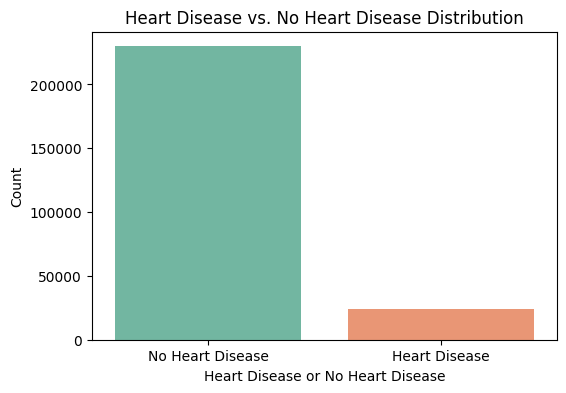

In [29]:
# Plot the class distribution (Heart Disease vs. No Heart Disease)
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDiseaseorAttack', data=df, palette='Set2')
plt.title('Heart Disease vs. No Heart Disease Distribution')
plt.xlabel('Heart Disease or No Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()


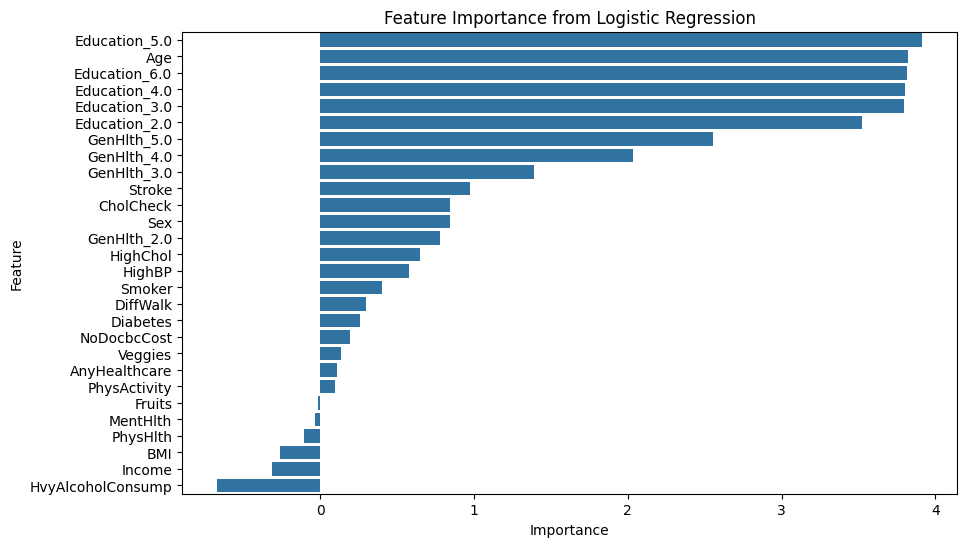

In [30]:
# Feature Importance from Logistic Regression (model coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
